In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
x = np.arange(10) #List of numbers from zero to n

In [4]:
y = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Text(0.5, 1.0, 'Squares')

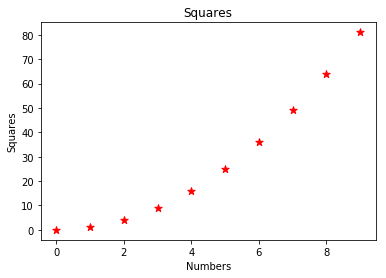

In [5]:
plt.scatter(x, y, s = 60, c = "r", marker = "*")  #Scatter plot of "x" v/s "y"
plt.xlabel("Numbers")
plt.ylabel("Squares")
plt.title("Squares")

In [6]:
day = np.arange(4)

In [7]:
day

array([0, 1, 2, 3])

In [8]:
temp_min = []
temp_max = []

In [9]:
for i in range(1, 5):
    temp_min.append(float(input("Enter the minimum temperature on day"+ str(i)+": ")))
    temp_max.append(float(input("Enter the maximum temperature on day"+ str(i)+ ": ")))
    

Enter the minimum temperature on day1: 


ValueError: could not convert string to float: 

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

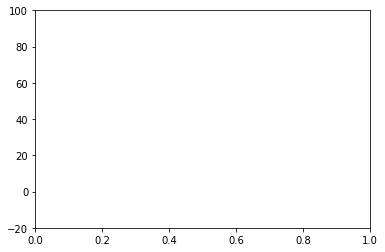

In [10]:
plt.ylim(-20, 100)
plt.plot(
day, temp_max,
day, temp_min,
day, temp_max, "*",
day, temp_min, "d")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Temperature Comparison")

In [4]:
from mpl_toolkits.mplot3d import Axes3D

(-2, 2)

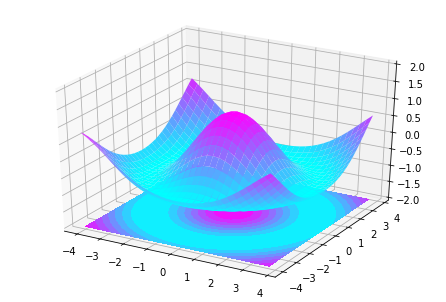

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.cm.cool)
ax.contourf(X, Y, Z, zdir = "z", offset = -2, cmap = plt.cm.cool)
ax.set_zlim(-2, 2)

In [7]:
Z

array([[ 0.8101836 ,  0.69652214,  0.56685558, ...,  0.42728983,
         0.56685558,  0.69652214],
       [ 0.69652214,  0.55711851,  0.40518589, ...,  0.24737424,
         0.40518589,  0.55711851],
       [ 0.56685558,  0.40518589,  0.235136  , ...,  0.06381093,
         0.235136  ,  0.40518589],
       ...,
       [ 0.42728983,  0.24737424,  0.06381093, ..., -0.11593362,
         0.06381093,  0.24737424],
       [ 0.56685558,  0.40518589,  0.235136  , ...,  0.06381093,
         0.235136  ,  0.40518589],
       [ 0.69652214,  0.55711851,  0.40518589, ...,  0.24737424,
         0.40518589,  0.55711851]])

In [12]:
df = pd.read_csv("Pokemon2.csv", index_col = "#")

In [13]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


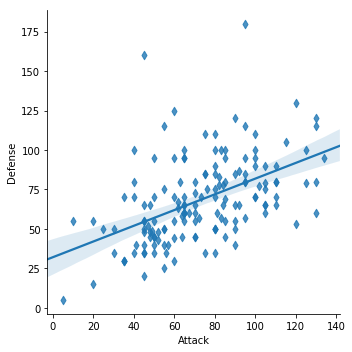

In [33]:
sns.lmplot(x = "Attack", y = "Defense", data = df, markers = "d")

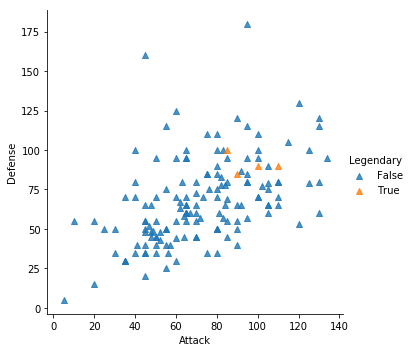

In [34]:
sns.lmplot(x = "Attack", y = "Defense", data = df, hue = "Legendary", fit_reg = False, markers = "^")

In [35]:
df_stats = df.iloc[:,:-2]

In [36]:
df_stats.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80


In [41]:
df_stats.drop("Total", 1, inplace = True)

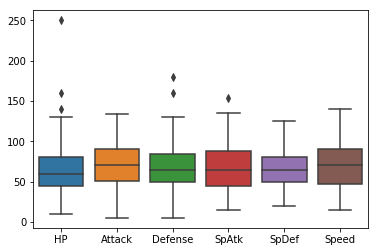

In [42]:
sns.boxplot(data = df_stats)

The boxplot gives the info abut the maximum , minimum value and the average value
the diamond points are the outliers in the data

In [52]:
df_legendary = df[df.Legendary == True]

In [53]:
df_legendary

,Name,Type 1,Type 2,HP,Attack,Defense,SpAtk,SpDef,Speed,Stage,Legendary
#,,,,,,,,,,,
144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True


In [55]:
df_legendary = df_legendary.drop(["Name", "Type 1", "Type 2", "Stage", "Legendary"], 1)

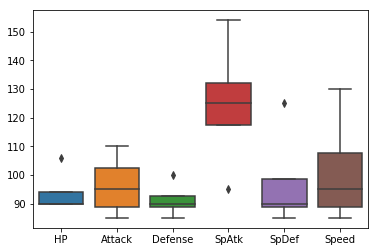

In [56]:
sns.boxplot(data = df_legendary)

In [58]:
df_stats.head()

,Name,Type 1,Type 2,HP,Attack,Defense,SpAtk,SpDef,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [60]:
melted_df = pd.melt(df_stats, id_vars = ["Name", "Type 1", "Type 2"], var_name = "Stat")

In [61]:
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [62]:
melted_df.Stat.unique()

array(['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'], dtype=object)

In [68]:
df["Type 1"].nunique()

15